[View in Colaboratory](https://colab.research.google.com/github/psm1996/saurabh/blob/master/MNIST_using_keras.ipynb)

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

gpg: keybox '/tmp/tmpa_ho8xsa/pubring.gpg' created
gpg: /tmp/tmpa_ho8xsa/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1


In [0]:
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass


In [4]:
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

··········


In [5]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [6]:
!ls

datalab  drive	gaurav	MNIST_data


In [0]:
import os
os.chdir("drive/MNIST")

In [8]:
!ls

Untitled0.ipynb


In [0]:
!pip install -q keras
import keras

In [84]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
import numpy as np
np.random.seed(123)  
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from keras.layers.convolutional import Conv2D

from keras import optimizers
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator


In [127]:
os.chdir('/content')
!git clone https://github.com/mixuala/colab_utils
import colab_utils.tboard
ROOT = %pwd
print(ROOT)
LOG_DIR = os.path.join(ROOT, 'MNIST')
print(LOG_DIR)
colab_utils.tboard.launch_tensorboard( bin_dir=ROOT, log_dir=LOG_DIR )

fatal: destination path 'colab_utils' already exists and is not an empty directory.
/content
/content/MNIST
ngrok installed
status: tensorboard=True, ngrok=True
('tensorboard url=', u'http://6cbb93c8.ngrok.io')


u'http://6cbb93c8.ngrok.io'

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [129]:
print X_train.shape

(60000, 28, 28)


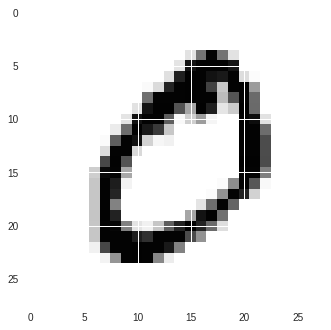

In [130]:
from matplotlib import pyplot as plt
plt.imshow(X_train[1])

In [131]:
print(keras.__version__)


2.1.6


In [0]:
seed = 7
np.random.seed(seed)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

In [0]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [147]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Fully connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))

model.add(Activation('softmax'))

InternalError: ignored

In [0]:


model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [0]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)


In [141]:
model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, 
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/5


InternalError: ignored